In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')  
transactions_df = pd.read_csv('Transactions.csv')  
products_df = pd.read_csv('Products.csv')  

In [3]:
# Data Preprocessing
# Merge customer and transaction data based on CustomerID
data = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

In [4]:
# Feature Engineering
customer_summary = data.groupby('CustomerID').agg(
    TotalTransactionValue=('TotalValue', 'sum'),
    PurchaseFrequency=('TransactionID', 'count'),
    AverageSpend=('TotalValue', 'mean')
).reset_index()

In [5]:
# Merge with customer profile information
customer_profile = customers_df[['CustomerID', 'Region']]
data = pd.merge(customer_summary, customer_profile, on='CustomerID', how='left')

In [6]:
# Selecting relevant columns for clustering
X = data[['TotalTransactionValue', 'PurchaseFrequency', 'AverageSpend']]

In [7]:
# Standardize the data to ensure features are on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

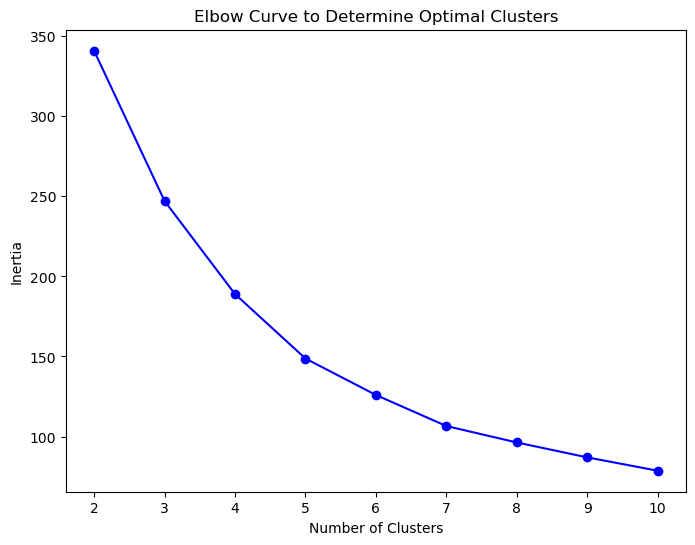

In [8]:
# Determine the optimal number of clusters (2 to 10) using the Elbow Method
inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve to help decide the  number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', color='b')
plt.title('Elbow Curve to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

* We can fix number of cluster as 4

In [9]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(X_scaled, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9088862131710538


* DBI = 0.9088862131710538 suggests that the clustering solution might not be optimal.
* A high DBI value implies that some clusters might be overlapping or that there is significant variance within clusters.

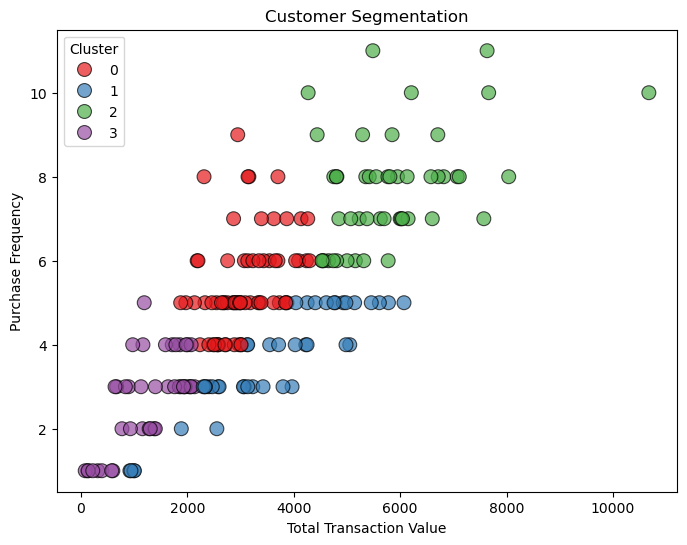

In [10]:
# Visualizing the clusters
# Scatter plot of 'TotalTransactionValue' vs 'PurchaseFrequency'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='TotalTransactionValue', y='PurchaseFrequency', hue='Cluster', palette='Set1', s=100, alpha=0.7, edgecolor='k')
plt.title('Customer Segmentation')
plt.xlabel('Total Transaction Value')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.show()

* The scatter plot visualizes four clusters (labeled 0, 1, 2, and 3) using different colors. This suggests that the customer base can be segmented into four distinct groups based on their purchase behavior.

* Cluster 0 appears to represent customers with high purchase frequency but relatively low transaction value. Cluster 1 shows customers with moderate purchase frequency and moderate transaction value. Cluster 2 seems to be the most valuable segment, with high purchase frequency and high transaction value. Cluster 3 represents customers with low purchase frequency and low transaction value.

* The segmentation can inform targeted marketing efforts. For example, Cluster 0 might benefit from promotions to increase average transaction value. Cluster 2, being the most valuable segment, could be rewarded with loyalty programs or exclusive offers. Cluster 3 might require reactivation campaigns to encourage repeat purchases.

In [11]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3454749066816505


* A Silhouette Score of 0.345 suggests that the clustering solution is moderately good.